In [4]:
import pyabc
from pyabc import ABCSMC
from slad import *

problem = CoreProblem()

distances = [
    pyabc.PNormDistance(),
    pyabc.AdaptivePNormDistance(adaptive=False, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.AdaptivePNormDistance(adaptive=True, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=False, normalize_labels=False)),
    #pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=True)),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False), adaptive=True),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False, n_fit=4), adaptive=True),
    pyabc.PNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(predictor=pyabc.MLPPredictor())),
    #pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
    #    predictor=pyabc.ModelSelection(
    #        predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
    #    ),
    #    n_fit=1,
    #)),pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
    #    predictor=pyabc.ModelSelection(
    #        predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
    #    ),
    #    n_fit=4,
    #)),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=1,
    ),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor(), pyabc.MLPPredictor()]
        ),
        n_fit=4,
    ),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear nn',
    #'Learned linear tn',
    'Learned linear tt',
    'Adaptive + LL tn',
    'Adaptive + LL tn n_fit=4',
    'GP',
    'Adaptive GP',
    'MLP',
    #'Model selection',
    #'Model selection n_fit=4',
    'Info weighted ms',
    'Info weighted ms n_fit=4',
]

def plot_history(history: pyabc.History, label: str):
    gt_pars = problem.get_gt_par()
    prior_bounds = problem.get_prior_bounds()
    
    fig, ax = plt.subplots(1,len(gt_pars))
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        for ix, (par, (lb, ub)) in enumerate(prior_bounds.items()):
            if par == 'p1':
                lb, ub = 350, 450
            elif par == 'p0':
                lb, ub = 0, 0.1
            pyabc.visualization.plot_kde_1d(
                df, w, xmin=lb, xmax=ub, numx=300, refval=gt_pars,
                x=par, xname=par, ax=ax[ix],
                label="PDF t={}".format(t))
    ax[-1].axvline(0, color='k', linestyle='dashed', label="True value")
    #ax[-1].legend()
    ax[-1].set_title(label)

In [2]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(problem.get_model(), problem.get_prior(), distance, population_size=100)
    abc.new(pyabc.create_sqlite_db_id(), problem.get_obs())
    h = abc.run(max_total_nr_simulations=5e3)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=73, start_time=2021-04-02 14:51:52.504401>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 271.2424255288539
INFO:ABC:t: 0, eps: 271.2424255288539.
INFO:ABC:Acceptance rate: 100 / 191 = 5.2356e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 162.87942936350063.
INFO:ABC:Acceptance rate: 100 / 240 = 4.1667e-01, ESS=8.7145e+01.
INFO:ABC:t: 2, eps: 100.81553239575547.
INFO:ABC:Acceptance rate: 100 / 278 = 3.5971e-01, ESS=8.1280e+01.
INFO:ABC:t: 3, eps: 70.93515795611434.
INFO:ABC:Acceptance rate: 100 / 324 = 3.0864e-01, ESS=8.3752e+01.
INFO:ABC:t: 4, eps: 46.82693634246759.
INFO:ABC:Acceptance rate: 100 / 424 = 2.3585e-01, ESS=7.9936e+01.
INFO:ABC:t: 5, eps: 34.82645144891908.
INFO:ABC:Acceptance rate: 100 / 572 = 1.7483e-01, ESS=5.6149e+01.
INFO:ABC:t: 6, eps: 23.551179069628073.
INFO:ABC:Acceptance rate: 100 / 745 = 1.3423e-01, ESS=7.2768e+01.
INFO:ABC:t: 7, eps: 18.453466723912577.
INFO:ABC:Acceptance rate: 100 / 948 = 1.0549e-01, ESS=8.8999e+01.
INFO:ABC:t: 8, eps: 12.153775307988386.
INFO:ABC:Acceptance rate: 100 / 1642 = 6.0901e-02, ESS=5.8375e+01.

Calibrated Euclidean


INFO:Epsilon:initial epsilon is 2.5274420928417767
INFO:ABC:t: 0, eps: 2.5274420928417767.
INFO:ABC:Acceptance rate: 100 / 208 = 4.8077e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 2.0017645602268686.
INFO:ABC:Acceptance rate: 100 / 330 = 3.0303e-01, ESS=9.1248e+01.
INFO:ABC:t: 2, eps: 1.5541887432025365.
INFO:ABC:Acceptance rate: 100 / 382 = 2.6178e-01, ESS=8.9403e+01.
INFO:ABC:t: 3, eps: 1.3042505344387945.
INFO:ABC:Acceptance rate: 100 / 588 = 1.7007e-01, ESS=8.1524e+01.
INFO:ABC:t: 4, eps: 1.0917756042991429.
INFO:ABC:Acceptance rate: 100 / 643 = 1.5552e-01, ESS=8.2823e+01.
INFO:ABC:t: 5, eps: 0.8738533315771504.
INFO:ABC:Acceptance rate: 100 / 1275 = 7.8431e-02, ESS=5.8411e+01.
INFO:ABC:t: 6, eps: 0.7479443770666718.
INFO:ABC:Acceptance rate: 100 / 2470 = 4.0486e-02, ESS=8.8964e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=74, duration=0:00:08.305792, end_time=2021-04-02 14:52:09.580040>
INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:H

Adaptive Euclidean


INFO:Epsilon:initial epsilon is 2.6476499863556504
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 2.6476499863556504.
INFO:ABC:Acceptance rate: 100 / 199 = 5.0251e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 2.0406860414626964.
INFO:ABC:Acceptance rate: 100 / 248 = 4.0323e-01, ESS=5.9218e+01.
INFO:ABC:t: 2, eps: 1.9802307687794083.
INFO:ABC:Acceptance rate: 100 / 360 = 2.7778e-01, ESS=8.9847e+01.
INFO:ABC:t: 3, eps: 1.656968795464273.
INFO:ABC:Acceptance rate: 100 / 583 = 1.7153e-01, ESS=8.6048e+01.
INFO:ABC:t: 4, eps: 1.5702011830035152.
INFO:ABC:Acceptance rate: 100 / 741 = 1.3495e-01, ESS=8.0337e+01.
INFO:ABC:t: 5, eps: 1.4031555681200238.
INFO:ABC:Acceptance rate: 100 / 972 = 1.0288e-01, ESS=7.2280e+01.
INFO:ABC:t: 6, eps: 1.31481792944526.
INFO:ABC:Acceptance rate: 100 / 1391 = 7.1891e-02, ESS=8.2194e+01.
INFO:ABC:t: 7, eps: 1.1396313515284153.
INFO:ABC:Acceptance rate: 100 / 1790 = 5.5866e-02, ESS=8.4846e+01.
INFO:pyabc.util:Stopping: total simulations bu

Learned linear nn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 229.34644352189378
INFO:ABC:t: 0, eps: 229.34644352189378.
INFO:ABC:Acceptance rate: 100 / 201 = 4.9751e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 100.84381769397315.
INFO:ABC:Acceptance rate: 100 / 222 = 4.5045e-01, ESS=7.0851e+01.
INFO:ABC:t: 2, eps: 48.90911055225798.
INFO:ABC:Acceptance rate: 100 / 216 = 4.6296e-01, ESS=7.6600e+01.
INFO:ABC:t: 3, eps: 27.057963118194518.
INFO:ABC:Acceptance rate: 100 / 178 = 5.6180e-01, ESS=8.2755e+01.
INFO:ABC:t: 4, eps: 12.696427257127132.
INFO:ABC:Acceptance rate: 100 / 199 = 5.0251e-01, ESS=7.7238e+01.
INFO:ABC:t: 5, eps: 5.594196705722575.
INFO:ABC:Acceptance rate: 100 / 247 = 4.0486e-01, ESS=7.6956e+01.
INFO:ABC:t: 6, eps: 3.171806302509257.
INFO:ABC:Acceptance rate: 100 / 211 = 4.7393e-01, ESS=8.9800e+01.
INFO:ABC:t: 7, eps: 1.5002680827009354.
INFO:ABC:Acceptance rate: 100 / 220 = 4.5455e-01, ESS=8.6312e+01.
INFO:ABC:t: 8, eps: 0.7351119003031229.
INFO:ABC:Acceptance rate: 

Learned linear tt


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.5133943223372843
INFO:ABC:t: 0, eps: 1.5133943223372843.
INFO:ABC:Acceptance rate: 100 / 170 = 5.8824e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.9680504625464407.
INFO:ABC:Acceptance rate: 100 / 227 = 4.4053e-01, ESS=9.2653e+01.
INFO:ABC:t: 2, eps: 0.6733737281751009.
INFO:ABC:Acceptance rate: 100 / 214 = 4.6729e-01, ESS=8.3496e+01.
INFO:ABC:t: 3, eps: 0.44727530707121077.
INFO:ABC:Acceptance rate: 100 / 313 = 3.1949e-01, ESS=6.0519e+01.
INFO:ABC:t: 4, eps: 0.3168586797120019.
INFO:ABC:Acceptance rate: 100 / 329 = 3.0395e-01, ESS=8.3455e+01.
INFO:ABC:t: 5, eps: 0.23897321873255736.
INFO:ABC:Acceptance rate: 100 / 392 = 2.5510e-01, ESS=1.3732e+01.
INFO:ABC:t: 6, eps: 0.1491201984795232.
INFO:ABC:Acceptance rate: 100 / 1179 = 8.4818e-02, ESS=8.0512e+01.
INFO:ABC:t: 7, eps: 0.11136201778725084.
INFO:ABC:Acceptance rate: 100 / 1273 = 7.8555e-02, ESS=7.8719e+01.
INFO:ABC:t: 8, eps: 0.08487285776540951.
INFO:ABC:Acceptan

Adaptive + LL tn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.6657233735634986
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.6657233735634986.
INFO:ABC:Acceptance rate: 100 / 179 = 5.5866e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.3604345488496152.
INFO:ABC:Acceptance rate: 100 / 247 = 4.0486e-01, ESS=8.7953e+01.
INFO:ABC:t: 2, eps: 1.151817229920541.
INFO:ABC:Acceptance rate: 100 / 297 = 3.3670e-01, ESS=7.8810e+01.
INFO:ABC:t: 3, eps: 0.9399870129915663.
INFO:ABC:Acceptance rate: 100 / 378 = 2.6455e-01, ESS=6.8204e+01.
INFO:ABC:t: 4, eps: 0.948865252284964.
INFO:ABC:Acceptance rate: 100 / 492 = 2.0325e-01, ESS=1.8566e+01.
INFO:ABC:t: 5, eps: 0.8742284860193706.
INFO:ABC:Acceptance rate: 100 / 515 = 1.9417e-01, ESS=5.2334e+01.
INFO:ABC:t: 6, eps: 0.8507257331200238.
INFO:ABC:Acceptance rate: 100 / 639 = 1.5649e-01, ESS=8.8698e+01.
INFO:ABC:t: 7, eps: 0.71961315318334.
INFO:ABC:Acceptance rate: 100 / 594 = 1.6835e-01, ESS=6.5974e+01.
INFO:ABC:t:

Adaptive + LL tn n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.6760230405372953
INFO:Population:Recording also rejected particles: True
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.6760230405372953.
INFO:ABC:Acceptance rate: 100 / 187 = 5.3476e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 1, eps: 1.2956515920910738.
INFO:ABC:Acceptance rate: 100 / 204 = 4.9020e-01, ESS=8.8514e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 2, eps: 1.1829956022120307.
INFO:ABC:Acceptance rate: 100 / 222 = 4.5045e-01, ESS=8.7023e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 3, eps: 0.8830787060728491.
INFO:ABC:Acceptance rate: 100 / 329 = 3.0395e-01, ESS=8.6547e+01.
INFO:ABC:t: 4, eps: 0.8775317399687222.
INFO:ABC:Acceptance rate: 100 / 373 = 2.6810e-01, ESS=3.3685e+01.
INFO:ABC:t: 5, eps: 0.8045609244361492.
INFO:ABC:Acceptance rate: 100 / 610 = 1.6393e-01, ESS=8.9242e+01.
INFO:ABC:t: 6, eps: 0.6535740217145521.
INFO:ABC:

GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 1.2696472010475064
INFO:ABC:t: 0, eps: 1.2696472010475064.
INFO:ABC:Acceptance rate: 100 / 224 = 4.4643e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.9276383587716596.
INFO:ABC:Acceptance rate: 100 / 193 = 5.1813e-01, ESS=8.8319e+01.
INFO:ABC:t: 2, eps: 0.6499108226418858.
INFO:ABC:Acceptance rate: 100 / 240 = 4.1667e-01, ESS=3.4565e+01.
INFO:ABC:t: 3, eps: 0.5269516609258862.
INFO:ABC:Acceptance rate: 100 / 320 = 3.1250e-01, ESS=8.3411e+01.
INFO:ABC:t: 4, eps: 0.3736852300627395.
INFO:ABC:Acceptance rate: 100 / 371 = 2.6954e-01, ESS=3.4443e+01.
INFO:ABC:t: 5, eps: 0.3009213594408189.
INFO:ABC:Acceptance rate: 100 / 461 = 2.1692e-01, ESS=7.2820e+01.
INFO:ABC:t: 6, eps: 0.22841695413345037.
INFO:ABC:Acceptance rate: 100 / 587 = 1.7036e-01, ESS=8.3810e+01.
INFO:ABC:t: 7, eps: 0.18151865388882396.
INFO:ABC:Acceptance rate: 100 / 793 = 1.2610e-01, ESS=6.8692e+01.
INFO:ABC:t: 8, eps: 0.1394887442256891.
INFO:ABC:Acceptance rate:

Adaptive GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 1.7695538935840525
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.7695538935840525.
INFO:ABC:Acceptance rate: 100 / 171 = 5.8480e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.3037225141387683.
INFO:ABC:Acceptance rate: 100 / 220 = 4.5455e-01, ESS=6.5298e+01.
INFO:ABC:t: 2, eps: 1.1672933338882492.
INFO:ABC:Acceptance rate: 100 / 317 = 3.1546e-01, ESS=8.3971e+01.
INFO:ABC:t: 3, eps: 1.0072650278342952.
INFO:ABC:Acceptance rate: 100 / 340 = 2.9412e-01, ESS=8.3725e+01.
INFO:ABC:t: 4, eps: 0.9620155589971995.
INFO:ABC:Acceptance rate: 100 / 401 = 2.4938e-01, ESS=7.7546e+01.
INFO:ABC:t: 5, eps: 0.8589005200059234.
INFO:ABC:Acceptance rate: 100 / 636 = 1.5723e-01, ESS=7.7835e+01.
INFO:ABC:t: 6, eps: 0.7277662174587695.
INFO:ABC:Acceptance rate: 100 / 486 = 2.0576e-01, ESS=5.3349e+01.
INFO:ABC:t: 7, eps: 0.7692010667666067.
INFO:ABC:Acceptance rate: 100 / 1023 = 9.7752e-02, ESS=8.1111e+01.
INFO:ABC:t

MLP


INFO:Predictor:Fitted MLPPredictor
INFO:Epsilon:initial epsilon is 1.453899175974122
INFO:ABC:t: 0, eps: 1.453899175974122.
INFO:ABC:Acceptance rate: 100 / 204 = 4.9020e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.0155302262328443.
INFO:ABC:Acceptance rate: 100 / 237 = 4.2194e-01, ESS=8.3566e+01.
INFO:ABC:t: 2, eps: 0.744812197910817.
INFO:ABC:Acceptance rate: 100 / 240 = 4.1667e-01, ESS=7.6883e+01.
INFO:ABC:t: 3, eps: 0.5698883723294702.
INFO:ABC:Acceptance rate: 100 / 290 = 3.4483e-01, ESS=1.4691e+01.
INFO:ABC:t: 4, eps: 0.4091188151221126.
INFO:ABC:Acceptance rate: 100 / 503 = 1.9881e-01, ESS=8.4560e+01.
INFO:ABC:t: 5, eps: 0.3002738973939497.
INFO:ABC:Acceptance rate: 100 / 396 = 2.5253e-01, ESS=1.8789e+01.
INFO:ABC:t: 6, eps: 0.2238303153687163.
INFO:ABC:Acceptance rate: 100 / 538 = 1.8587e-01, ESS=6.8763e+00.
INFO:ABC:t: 7, eps: 0.11273236507884155.
INFO:ABC:Acceptance rate: 100 / 2074 = 4.8216e-02, ESS=8.3972e+01.
INFO:ABC:t: 8, eps: 0.08082599009749154.
INFO:ABC:Acceptance rate: 

Info weighted ms


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Score LinearPredictor: 5.44e+00
INFO:Predictor:Score GPPredictor: 5.49e+00
INFO:Predictor:Score MLPPredictor: 6.48e+00
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.4798045303729548
INFO:ABC:t: 0, eps: 0.4798045303729548.
INFO:ABC:Acceptance rate: 100 / 216 = 4.6296e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.23603374031955432.
INFO:ABC:Acceptance rate: 100 / 211 = 4.7393e-01, ESS=8.8429e+01.
INFO:ABC:t: 2, eps: 0.1169239

Info weighted ms n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted MLPPredictor
INFO:Predictor:Score LinearPredictor: 5.51e+00
INFO:Predictor:Score GPPredictor: 5.66e+00
INFO:Predictor:Score MLPPredictor: 6.16e+00
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.2560277260303969
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.2560277260303969.
INFO:ABC:Acceptance rate: 100 / 200 = 5.0000e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Pre

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

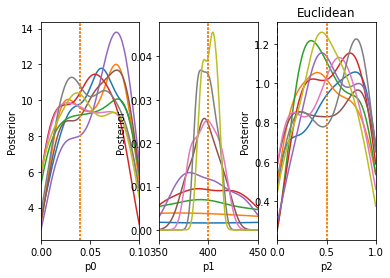

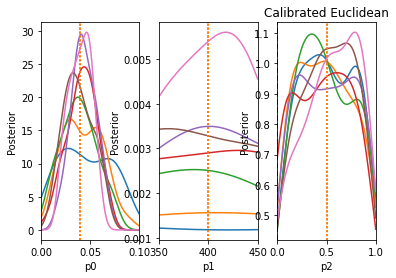

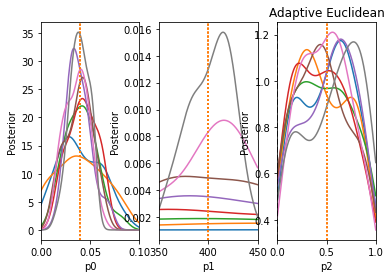

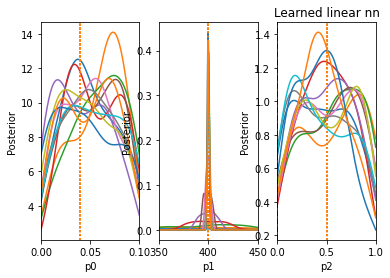

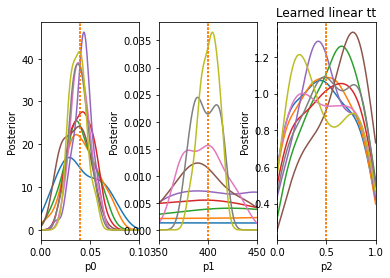

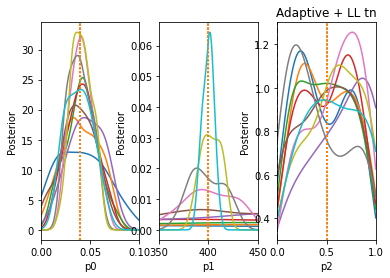

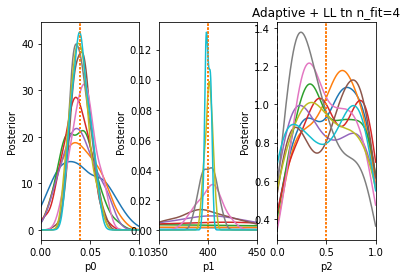

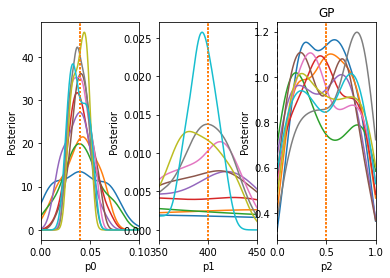

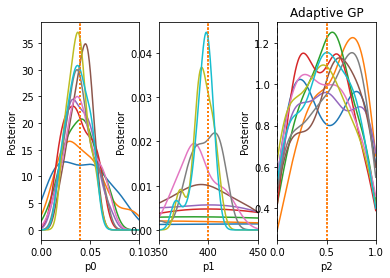

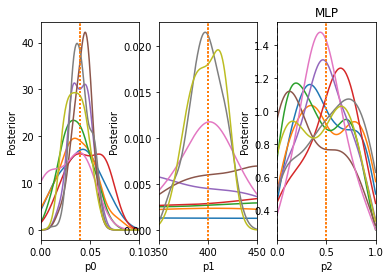

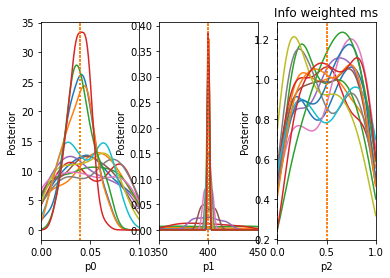

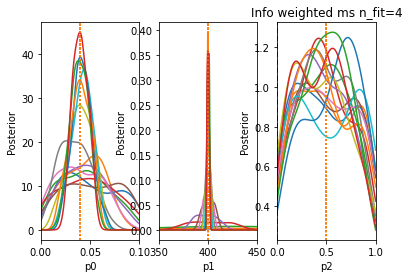

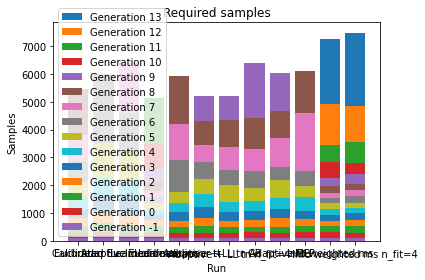

In [5]:
import matplotlib.pyplot as plt

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

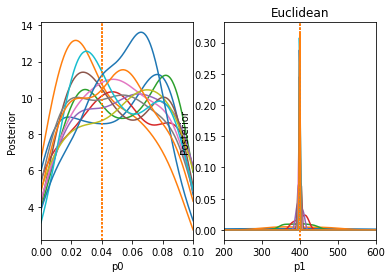

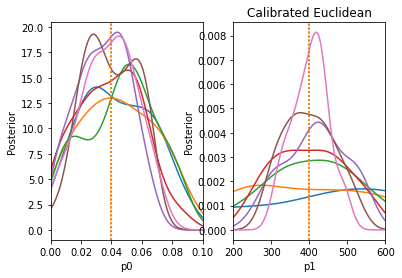

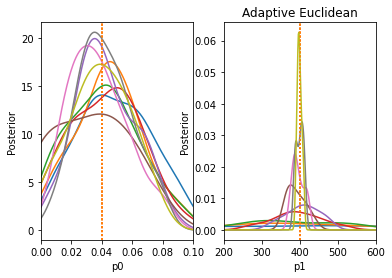

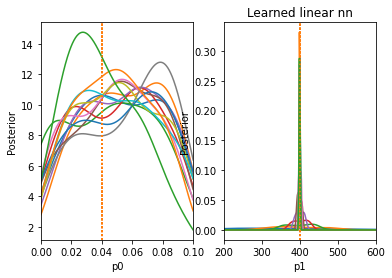

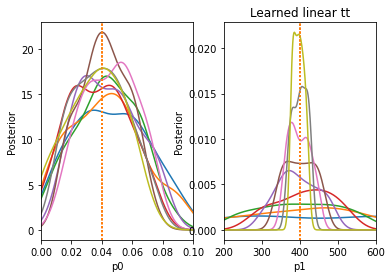

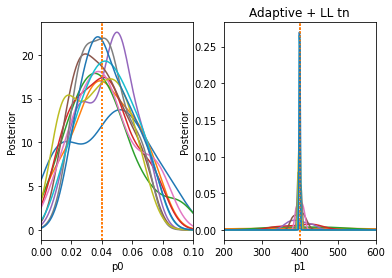

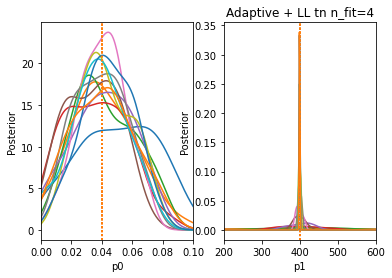

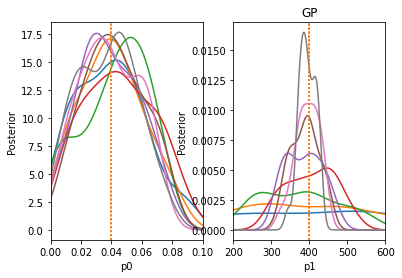

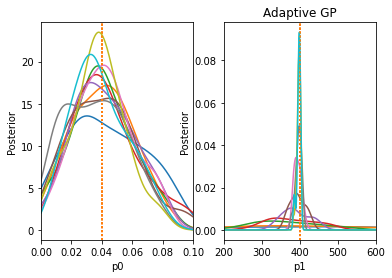

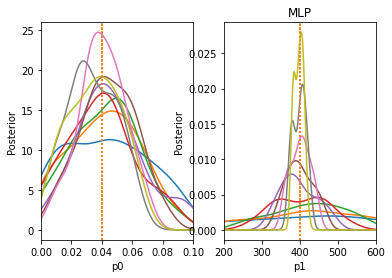

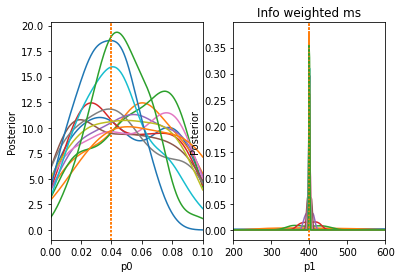

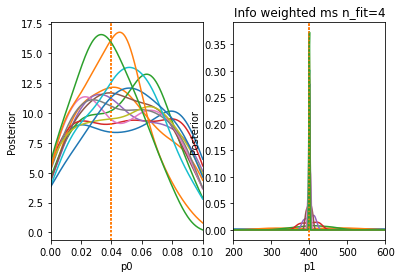

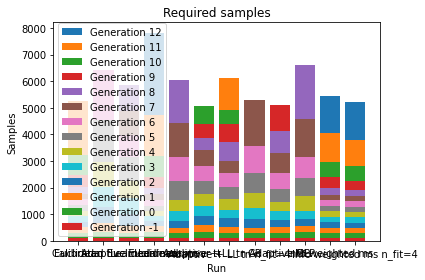

In [7]:
import matplotlib.pyplot as plt

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)